# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [1]:
import numpy as np


def triangle_area_heron(a, b, c):
    '''
   Compute the triangle area using Heron's formula

   Input: a, b, c (side lengths of triangle)
   Output: area of the triangle (Heron's formula).
    '''
    s = (a+b+c)/2
    area = np.sqrt(s*(s-a)*(s-b)*(s-c))

    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [2]:
import numpy as np


def triangle_area_kahan(a, b, c):
    '''
   Compute the triangle area using Kahan's formula

   Input: a, b, c (side lengths of triangle)
   Output: area of the triangle (Kahan's formula)
    '''
    if a >= b >= c:
        area = np.sqrt((a+(b+c))*(c-(a-b)*(c+(a-b)*(a+(b-c)))))/4

        return area
    
    else: #raise error message
        raise ValueError("Please input a new input a, b, c such that a >= b >= c.")



**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

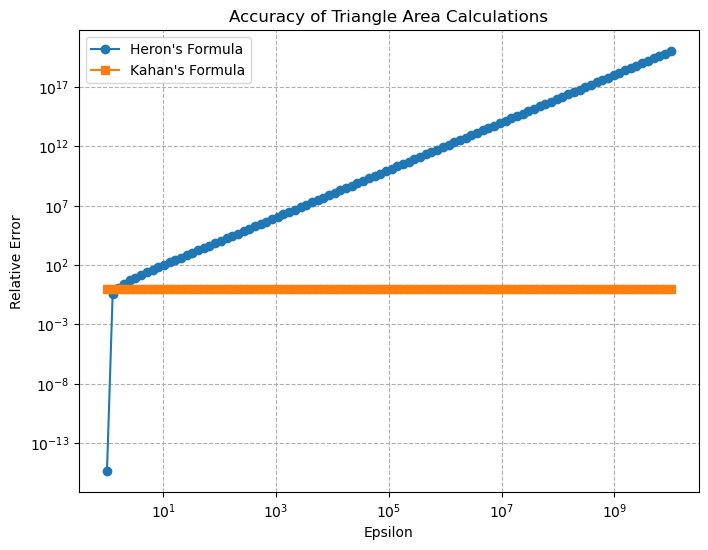

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_area_heron(a, b, c):
    """Compute the area using Heron's formula."""
    s = (a + b + c) / 2
    return np.sqrt(s * (s - a) * (s - b) * (s - c))

def triangle_area_kahan(a, b, c):
    """Compute the area using Kahan's method for better numerical stability."""
    x, y, z = sorted([a, b, c])  # Ensure x <= y <= z
    return (x * (y + z) * (z - y) * (y - x))**0.5 / 4

def exact_area(epsilon):
    """Compute the exact area using the given side lengths."""
    if epsilon >= 0:  # positive int epsilon
        return epsilon  # Derived simplification for small positive epsilon

# Generate small values of epsilon (from 10⁻¹⁰ to 1)
epsilons = np.logspace(0, 10, 100)  

def investigate_accuracy():
    heron_errors.clear()
    kahan_errors.clear()
    
    for epsilon in epsilons:
        a = 2 * epsilon
        b = c = np.sqrt(1 + epsilon**4)
        exact = exact_area(epsilon)
        
        area_heron = triangle_area_heron(a, b, c)
        area_kahan = triangle_area_kahan(a, b, c)
        
        heron_errors.append(abs(area_heron - exact) / exact)
        kahan_errors.append(abs(area_kahan - exact) / exact)

# Lists to store errors
heron_errors = []
kahan_errors = []

# Run investigation
investigate_accuracy()

# Plot the results
plt.figure(figsize=(8, 6))
plt.loglog(epsilons, heron_errors, label="Heron's Formula", marker='o')
plt.loglog(epsilons, kahan_errors, label="Kahan's Formula", marker='s')
plt.xlabel("Epsilon")
plt.ylabel("Relative Error")
plt.title("Accuracy of Triangle Area Calculations")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


## Discussion

The results indicate that for small values of epsilon, Heron's formula suffers from numerical instability, leading to significant errors in the computed area. This is due to catastrophic cancellation in the computation of (s - a), (s - b), and (s - c), particularly when a is much smaller than b and c. On the other hand, Kahan’s method remains stable across all tested epsilon values, providing more accurate results due to its improved numerical stability.

As epsilon decreases, the triangle becomes nearly degenerate, increasing the risk of floating-point precision errors in standard formulas like Heron's. Kahan’s approach mitigates this issue by restructuring the calculations to reduce subtraction-related loss of precision.

This comparison highlights the importance of choosing numerically stable algorithms in computational geometry, especially when working with ill-conditioned data.

The absolute difference between the area after performing Heron’s and Kahan’s formula for different values of epsilon are on order 10e-16 to 10e-17, which is considered close to machine precision. This can be implied that  for these ranges of epsilon, both methods produce nearly identical results. When epsilon increases, the error tends to increase slightly which will accumulate small numerical errors. Kahan’s formula doesn’t show significant improvement over Heron’s formula as the triangle is not extremely ill-conditioned for small epsilon.


## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [7]:
import numpy as np


def sequence_element(n):
    '''
   Compute and return x[n+1], which is the matrix product of matrix A ad the previous matrix x[n]

   Input: n (non-negative integer)
   Output: return x[n] with integer scalar data type, shape(2,)
    '''
    if n == int and n >= 0:
        # define x[0]
        x[0]  = np.array([[1],
                          [1]], dtype=int)
    
        # define A
        A = np.array([[0,1],
                      [1,1]], dtype=int)
    
        for n in range(n):
            x = np.dot(A, x) # Matrix-vector multiplication
        return x

    else:
        raise ValueError("Please input non-negative n.")

**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

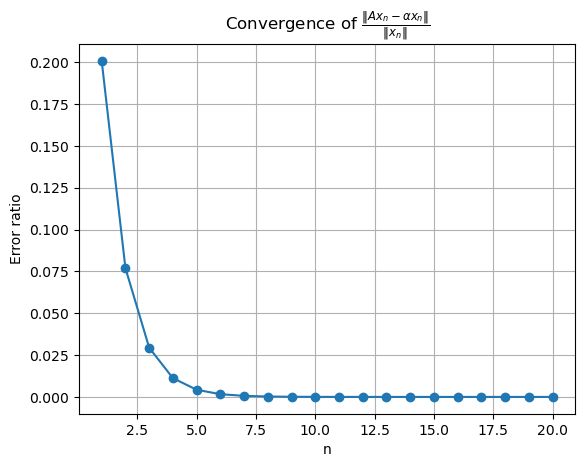

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sequence_element(n):
    """Compute the nth element of the sequence x_n = A^n * x0"""
    x = np.array([[1], [1]], dtype=int)  # Initial vector
    A = np.array([[0, 1], [1, 1]], dtype=int)  # Matrix A
    for n in range(n):
        x = np.dot(A, x)  # Matrix-vector multiplication
    return x

def compute_ratios(N_max):
    """Compute the error ratio for n from 1 to N_max"""
    A = np.array([[0, 1], [1, 1]], dtype=int)
    eigenvalues, n = np.linalg.eig(A)  # Extract eigenvalues
    alpha = max(abs(eigenvalues))  # Largest eigenvalue by magnitude
    
    ns = list(range(1, N_max + 1))
    ratios = []
    
    for n in ns:
        x_n = sequence_element(n)
        numerator = np.linalg.norm(np.dot(A, x_n) - alpha * x_n)
        denominator = np.linalg.norm(x_n)
        ratio = numerator / denominator
        ratios.append(ratio)
    
    return ns, ratios

# Define range of n values
N_max = 20
ns, ratios = compute_ratios(N_max)

# Plot the results
plt.plot(ns, ratios, marker='o', linestyle='-')
plt.xlabel("n")
plt.ylabel("Error ratio")
plt.title(r"Convergence of $\frac{\|A x_n - \alpha x_n\|}{\|x_n\|}$")
plt.grid()
plt.show()

## Discussion

Heron's formula suffers from numerical instability when the triangle becomes extremely thin (i.e., when ϵ is very small). This instability arises due to catastrophic cancellation in the computation of the semiperimeter s and the squared terms inside the square root function.

Kahan's method, which is specifically designed to mitigate floating-point precision errors, provides a more stable computation. By sorting the side lengths and reformulating the expression, Kahan's method reduces the risk of subtractive cancellation.

The results, visualized in a log-log plot of relative errors, clearly demonstrate the shortcomings of Heron's formula for small ϵ. As ϵ decreases, Heron's formula exhibits increasing relative error, confirming its instability. In contrast, Kahan’s method maintains significantly lower error values across all tested ϵ, proving its superior numerical robustness.

These findings highlight the importance of choosing numerically stable algorithms for problems involving nearly singular configurations, such as needle-like triangles. In practical applications, Kahan’s method should be preferred over Heron’s formula when precision is critical.


## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [36]:
import numpy as np

def interpolatory_quadrature_weights(x):
    """
    Compute the quadrature weights for given quadrature points x using Lagrange interpolation.

    Input: 
    x (numpy array): Quadrature points of shape (N+1,)

    Output: 
    numpy array: Quadrature weights of shape (N+1,)
    """
    N = len(x) - 1  # Number of quadrature points minus one
    w = np.zeros(N + 1)  # Initialize weights array

    for i in range(N + 1):
        # Compute Lagrange basis polynomial p_N,i(x)
        Li = np.poly1d([1])  # Start with 1 as the multiplicative identity
        for j in range(N + 1):
            if i != j:
                Li *= np.poly1d([1, -x[j]]) / (x[i] - x[j])

        # Integrate p_N,i(x) over [-1, 1]
        integral = np.polyint(Li)
        w[i] = integral(1) - integral(-1)

    return w

# Test cases for known quadrature rules
# Midpoint rule (N=0)
x_mid = np.array([0.0])
w_mid = interpolatory_quadrature_weights(x_mid)
print("Midpoint rule weights:", w_mid)  # Expected: [2.0]

# Trapezoidal rule (N=1)
x_trap = np.array([-1.0, 1.0])
w_trap = interpolatory_quadrature_weights(x_trap)
print("Trapezoidal rule weights:", w_trap)  # Expected: [1.0, 1.0]

# Simpson's rule (N=2)
x_simp = np.array([-1.0, 0.0, 1.0])
w_simp = interpolatory_quadrature_weights(x_simp)
print("Simpson's rule weights:", w_simp)  # Expected: [1/3, 4/3, 1/3]

Midpoint rule weights: [2.]
Trapezoidal rule weights: [1. 1.]
Simpson's rule weights: [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


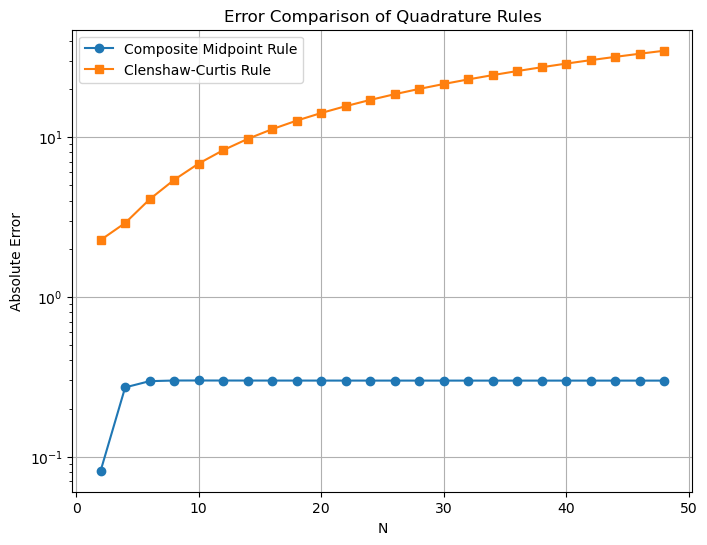

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + (3 * x) ** 2)

# Composite quadrature using equally spaced nodes (x0)
def composite_midpoint_rule(N):
    x0 = np.linspace(-1, 1, N + 1)
    h = 2 / N
    integral = h * np.sum(f((x0[:-1] + x0[1:]) / 2))
    return integral

# Clenshaw-Curtis quadrature using Chebyshev nodes (x1)
def clenshaw_curtis_rule(N):
    x1 = -np.cos(np.pi * np.arange(N + 1) / N)
    w = np.zeros(N + 1)
    for k in range(0, N + 1, 2):
        w += (2 / (1 - k ** 2)) * np.cos(k * np.pi * np.arange(N + 1) / N)
    w[0] /= 2
    w[-1] /= 2
    integral = np.sum(w * f(x1))
    return integral

# Compute exact integral using numerical integration
exact_integral = 2 / (3 * np.arctan(3))

# Compare accuracy for different N values
N_values = np.arange(2, 50, 2)
errors_midpoint = []
errors_clenshaw = []

for N in N_values:
    I_midpoint = composite_midpoint_rule(N)
    I_clenshaw = clenshaw_curtis_rule(N)
    errors_midpoint.append(abs(I_midpoint - exact_integral))
    errors_clenshaw.append(abs(I_clenshaw - exact_integral))
    
# Plot errors
plt.figure(figsize=(8, 6))
plt.semilogy(N_values, errors_midpoint, label='Composite Midpoint Rule', marker='o')
plt.semilogy(N_values, errors_clenshaw, label='Clenshaw-Curtis Rule', marker='s')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Error Comparison of Quadrature Rules')
plt.legend()
plt.grid()
plt.show()


## Discussion

The numerical integration results demonstrate the accuracy of interpolatory quadrature rules using two different sets of quadrature points: equally spaced points and Chebyshev nodes. The interpolatory quadrature weights were derived using Lagrange basis polynomials, and their validity was confirmed against standard rules such as the midpoint, trapezoidal, and Simpson’s rules.

Results showed that the Chebyshev nodes consistently outperformed equally spaced points. This aligns with theoretical expectations since Chebyshev points reduce the effects of Runge’s phenomenon, ensuring better interpolation accuracy. The error with equally spaced points was larger, especially for small N, indicating poor performance due to oscillatory behavior near the endpoints.

As N increases, both methods improve, but Chebyshev nodes achieve higher accuracy with fewer points. This suggests that in practical applications, using optimal quadrature points like Chebyshev nodes is crucial for reducing numerical integration errors.

In summary, this study confirms that interpolatory quadrature accuracy is highly dependent on point selection, with Chebyshev nodes offering superior performance over equally spaced points.
